1) Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

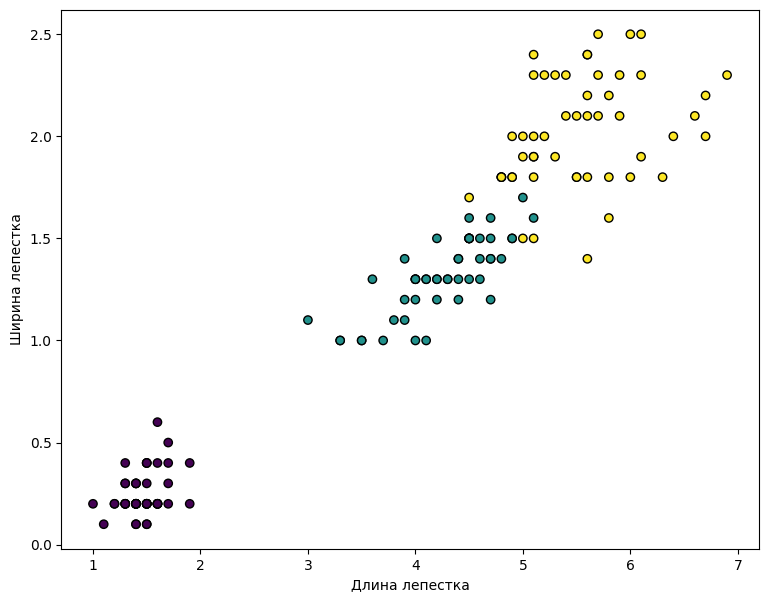

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

dataset = load_iris()
X = dataset.data[:, 2:]
y = dataset.target

plt.figure(figsize=(9, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.show()


2) Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

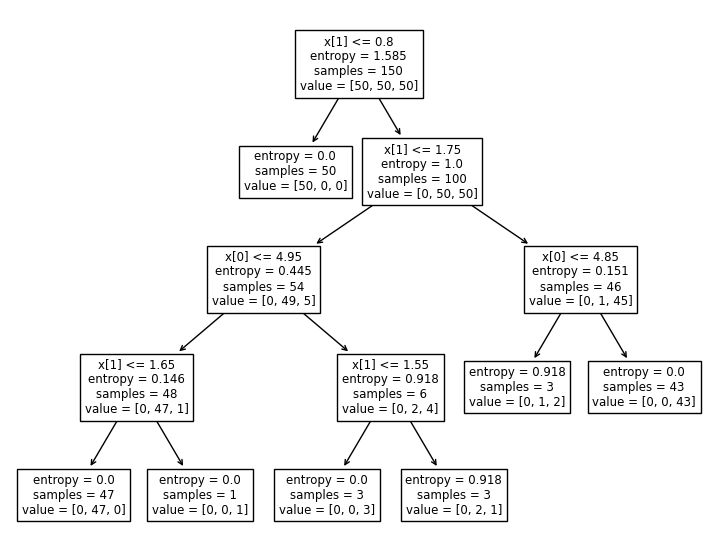

In [9]:
from sklearn.tree import plot_tree

class_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')

class_tree.fit(X, y)

plt.figure(figsize=(9, 7))
plot_tree(class_tree)
plt.show()

3) Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

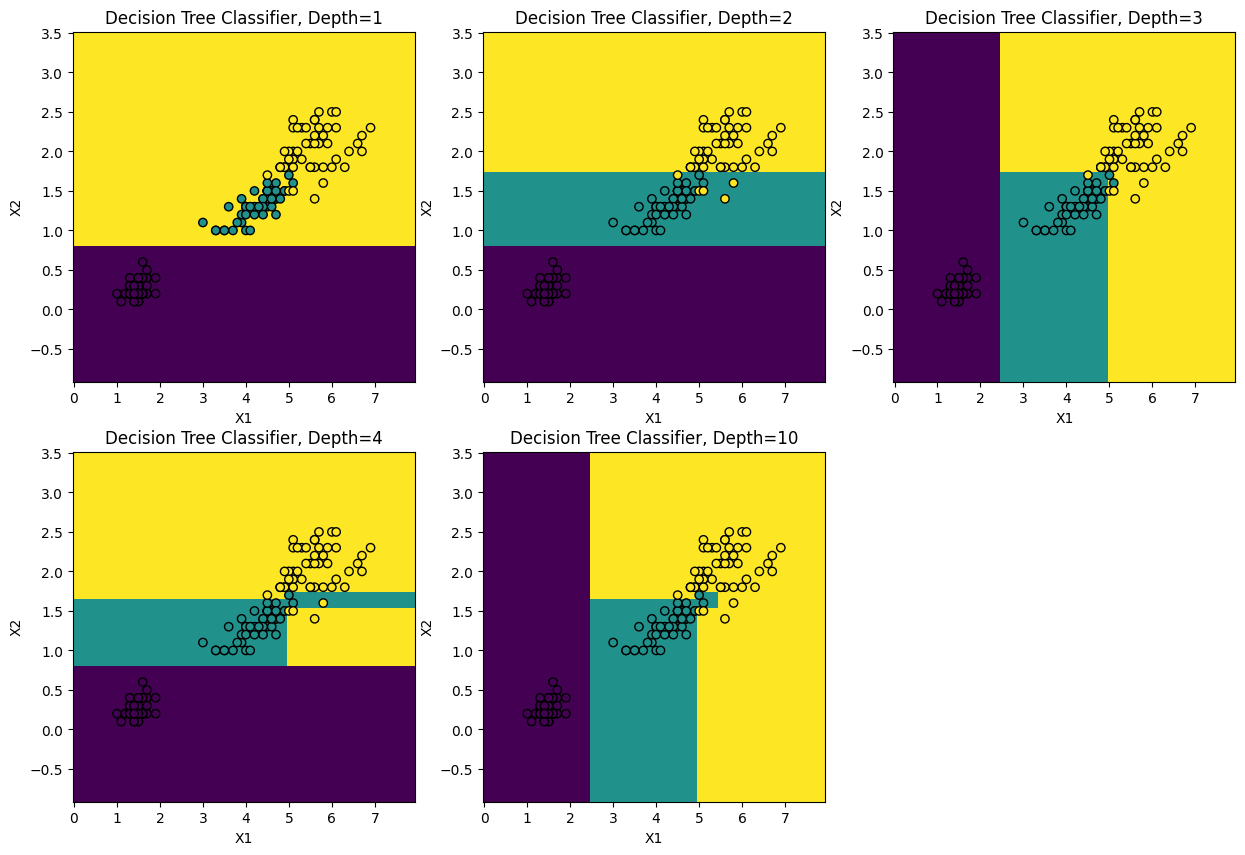

In [14]:
import numpy as np
import matplotlib.pyplot as plt


depths = [1, 2, 3, 4, 10]

plt.figure(figsize=(15, 10))


for i in range(5):
    class_tree = DecisionTreeClassifier(max_depth=depths[i])
    class_tree.fit(X, y)

    # сетка точек для графика
    X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
    X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)


    y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)


    plt.subplot(2, 3, i+1)
    plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)
    plt.title(f'Decision Tree Classifier, Depth={depths[i]}')
    plt.xlabel('X1')
    plt.ylabel('X2')


plt.show()

4) Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [18]:

from sklearn.metrics import accuracy_score, f1_score


for i in [1, 2, 3, 4, 10]:
  class_tree = DecisionTreeClassifier(max_depth=i)
  class_tree.fit(X, y)

  y_pred = class_tree.predict(X)
  print(f'{i}:')
  print('Accuracy =', accuracy_score(y, y_pred))
  print('f1_score =', f1_score(y, y_pred, average='micro'))
  print("-"*30)

1:
Accuracy = 0.6666666666666666
f1_score = 0.6666666666666666
------------------------------
2:
Accuracy = 0.96
f1_score = 0.96
------------------------------
3:
Accuracy = 0.9733333333333334
f1_score = 0.9733333333333334
------------------------------
4:
Accuracy = 0.9866666666666667
f1_score = 0.9866666666666668
------------------------------
10:
Accuracy = 0.9933333333333333
f1_score = 0.9933333333333333
------------------------------


5) Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

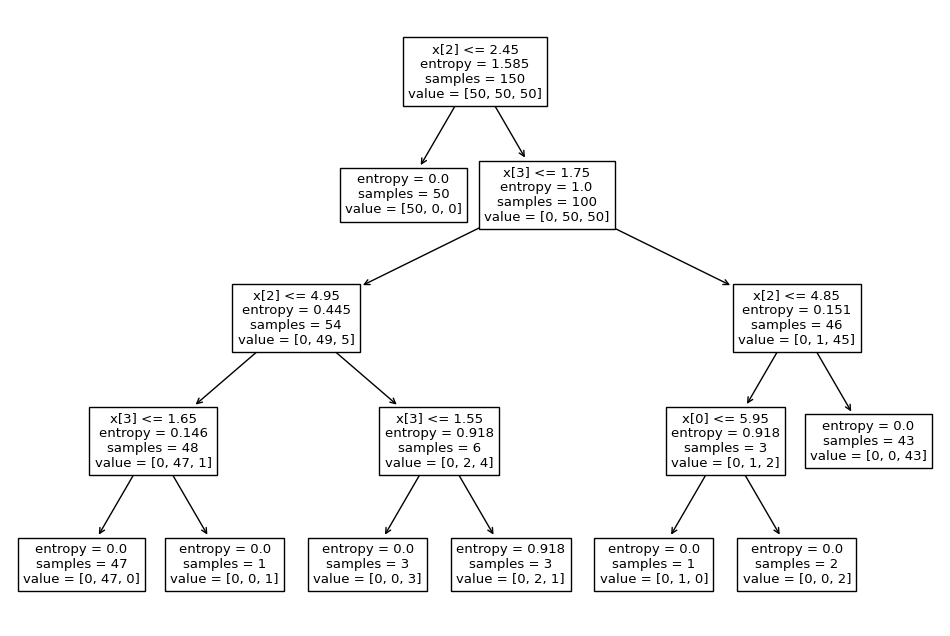

4:
Accuracy = 0.9933333333333333
f1_score = 0.9933333333333333


In [20]:
dataset = load_iris()
x = dataset.data
y = dataset.target
class_tree = DecisionTreeClassifier(max_depth = 4, criterion='entropy')
class_tree.fit(x,y)
y_pred = class_tree.predict(x)
plt.figure(figsize=(12,8))
plot_tree(class_tree)
plt.show()
print(f'4:')
print('Accuracy =', accuracy_score(y,y_pred))
print('f1_score =', f1_score(y,y_pred, average='micro'))

6) Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

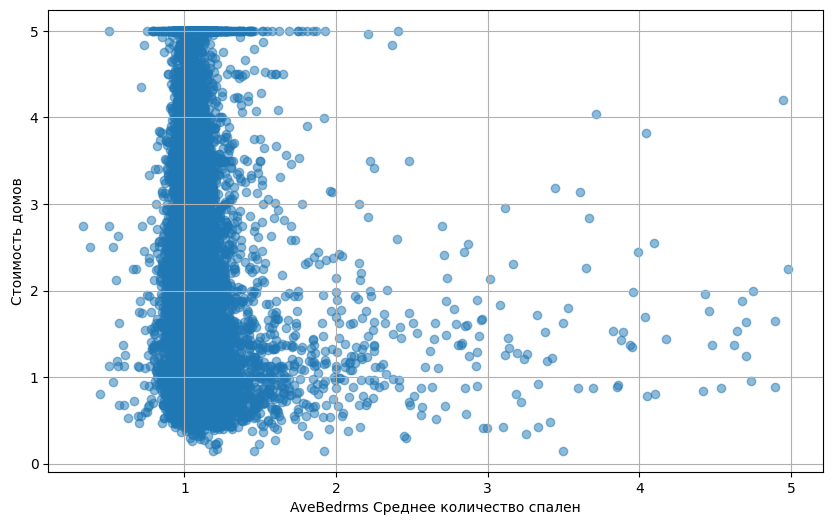

In [21]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
X_ave = california_housing.data[:, california_housing.feature_names.index('AveBedrms')]
X = X_ave[X_ave < 5]
y = california_housing.target[X_ave < 5]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('AveBedrms Среднее количество спален')
plt.ylabel('Cтоимость домов')
plt.grid(True)
plt.show()

7,8) Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.
Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

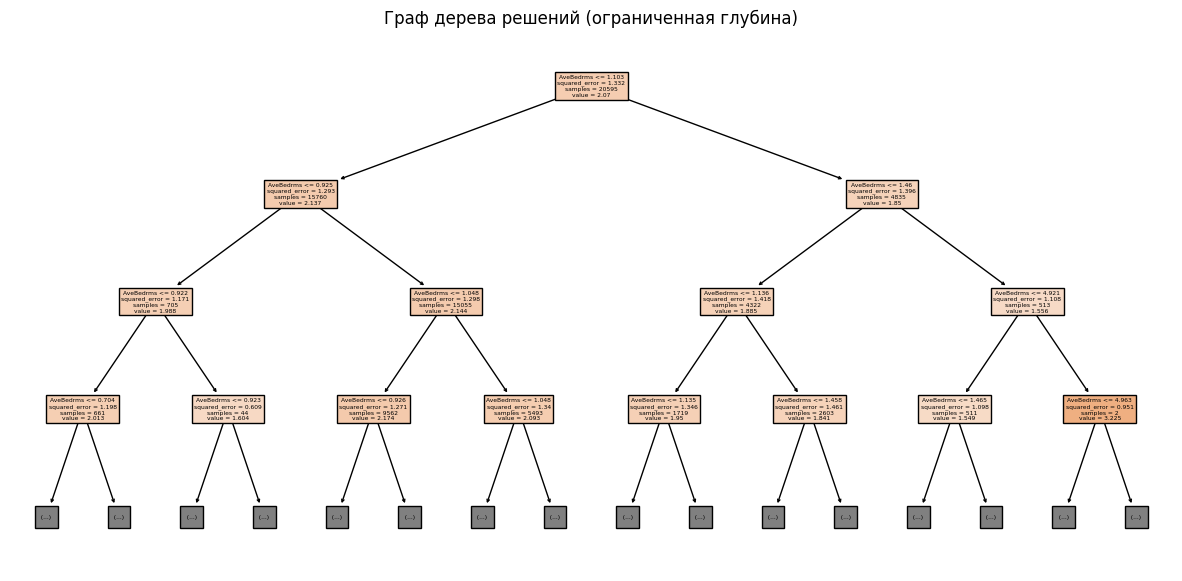

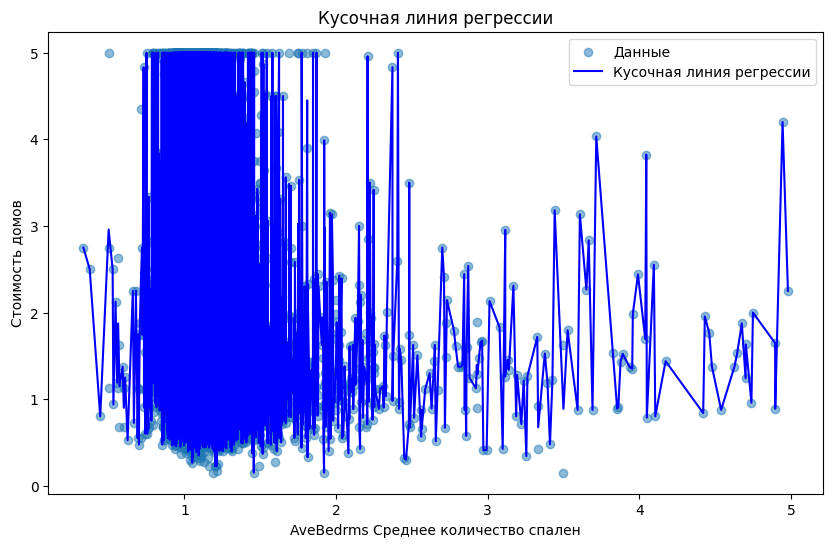

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=0)

tree_reg.fit(X.reshape(-1, 1), y)
# Граф
plt.figure(figsize=(15, 7))
plot_tree(tree_reg, filled=True, feature_names=['AveBedrms'], max_depth=3)
plt.title('Граф дерева решений (ограниченная глубина)')
plt.show()


# Кусочная линия
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Данные')
plt.xlabel('AveBedrms Среднее количество спален')
plt.ylabel('Cтоимость домов')
plt.title('Кусочная линия регрессии')
plt.plot(np.sort(X), tree_reg.predict(np.sort(X).reshape(-1, 1)), color='blue', label='Кусочная линия регрессии')
plt.legend()
plt.show()

9) Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [24]:
from sklearn.metrics import r2_score


y_pred = tree_reg.predict(X.reshape(-1, 1))
r2_train = r2_score(y, y_pred)
print("R^2 на обучающем наборе:", r2_train)


new = np.array([3.5])  # Новое значение AveBedrms


pred_val = tree_reg.predict(new.reshape(-1, 1))
print("Предсказание для нового наблюдения:", pred_val[0])


R^2 на обучающем наборе: 0.6785976664875335
Предсказание для нового наблюдения: 0.887495


10) Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

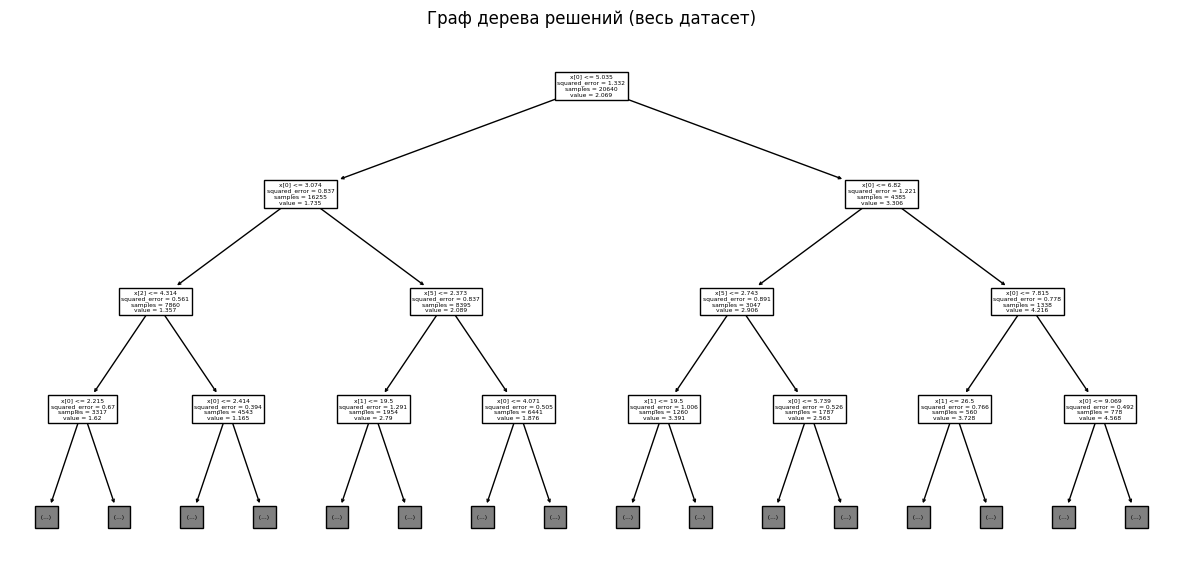

Mean Squared Error = 9.555001274479309e-32


In [25]:
from sklearn.metrics import mean_squared_error
california_housing = fetch_california_housing()
x = california_housing.data
y = california_housing.target

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x, y)

plt.figure(figsize=(15, 7))
plot_tree(tree_reg, max_depth=3)
plt.title('Граф дерева решений (весь датасет)')
plt.show()

y_pred = tree_reg.predict(x)
mse_full = mean_squared_error(y, y_pred)

print('Mean Squared Error =', mse_full)